In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import statsmodels.stats.power as smp

In [3]:
master_final_df = pd.read_csv('master_dedup_v2.csv')
master_final_df

,movie_name,genres,percentage_ROI_gross_budget,gross,budget,opening_weekend_boxoffice,average_rating,number_vote,primary_name,primary_profession,release_date,release_year,runtime_minutes,distributor,max_theatre_count
0,alice in wonderland,"adventure,family,fantasy",167.10,334191110.0,200000000.0,116101023.0,6.25,179407.0,Lewis Carroll,"writer,soundtrack,miscellaneous",2010-01-01 00:00:00,2010,108.0,Walt Disney,"3,739"
1,ca$h,"crime,thriller",0.66,46488.0,7000000.0,16469.0,5.90,4358.0,Stephen Milburn Anderson,"producer,writer,production_manager",2010-01-01 00:00:00,2010,108.0,Roadside …,43
2,8: the mormon proposition,documentary,4.01,100280.0,2500000.0,42566.0,6.60,600.0,Reed Cowan,"producer,director,writer",2010-01-01 00:00:00,2010,80.0,Red Flag …,16
3,the gift,documentary,875.75,43787265.0,5000000.0,11854273.0,8.30,23.0,Dave Hagen,"editor,animation_department,producer",2010-01-01 00:00:00,2010,105.0,STX Enter…,"2,503"
4,your highness,"adventure,comedy,fantasy",43.19,21596445.0,50000000.0,9360020.0,4.25,46472.0,Ben Best,"writer,actor,producer",2010-01-01 00:00:00,2011,102.0,Universal,"2,772"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,on the basis of sex,"biography,drama",123.11,24622687.0,20000000.0,686355.0,7.15,6154.0,Daniel Stiepleman,"writer,art_department,art_director",2018-12-25 00:00:00,2018,120.0,Focus Fea…,"1,957"
1286,holmes & watson,"adventure,comedy,crime",72.78,30568743.0,42000000.0,7411522.0,3.95,8939.0,Arthur Conan Doyle,"writer,producer,actor",2018-12-25 00:00:00,2018,90.0,Sony Pict…,"2,780"
1287,destroyer,"action,crime,drama",17.04,1533324.0,9000000.0,55347.0,6.05,6929.0,Phil Hay,"writer,producer,actor",2018-12-25 00:00:00,2018,121.0,Annapurna…,235
1288,the upside,"comedy,drama",288.63,108235497.0,37500000.0,20355000.0,7.00,12221.0,Olivier Nakache,"writer,director,producer",2019-01-11 00:00:00,2017,126.0,STX Enter…,"3,568"


In [4]:
master_final_df.columns

Index(['movie_name', 'genres', 'percentage_ROI_gross_budget', 'gross',
       'budget', 'opening_weekend_boxoffice', 'average_rating', 'number_vote',
       'primary_name', 'primary_profession', 'release_date', 'release_year',
       'runtime_minutes', 'distributor', 'max_theatre_count'],
      dtype='object')

## Two Sample T-Test: One-tailed

**Null Hypothesis:** The mean ROI of horror movies is less than or equal to that of non-horror movies.

**Alternative Hypothesis:** The mean ROI of horror movies is greater than that of non-horror movies.


In [5]:
# Split data into two groups (samples)
horror_movies = master_final_df[master_final_df['genres'].str.contains('horror', case=False, regex=True)]
non_horror_movies = master_final_df[~master_final_df['genres'].str.contains('horror', case=False, regex=True)]

# Sanity check
horror_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 11 to 1275
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   movie_name                   150 non-null    object 
 1   genres                       150 non-null    object 
 2   percentage_ROI_gross_budget  150 non-null    float64
 3   gross                        150 non-null    float64
 4   budget                       150 non-null    float64
 5   opening_weekend_boxoffice    150 non-null    float64
 6   average_rating               150 non-null    float64
 7   number_vote                  150 non-null    float64
 8   primary_name                 150 non-null    object 
 9   primary_profession           150 non-null    object 
 10  release_date                 150 non-null    object 
 11  release_year                 150 non-null    int64  
 12  runtime_minutes              150 non-null    float64
 13  distributor       

In [6]:
# Sanity check
non_horror_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1140 entries, 0 to 1289
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   movie_name                   1140 non-null   object 
 1   genres                       1140 non-null   object 
 2   percentage_ROI_gross_budget  1140 non-null   float64
 3   gross                        1140 non-null   float64
 4   budget                       1140 non-null   float64
 5   opening_weekend_boxoffice    1140 non-null   float64
 6   average_rating               1140 non-null   float64
 7   number_vote                  1140 non-null   float64
 8   primary_name                 1140 non-null   object 
 9   primary_profession           1140 non-null   object 
 10  release_date                 1140 non-null   object 
 11  release_year                 1140 non-null   int64  
 12  runtime_minutes              1140 non-null   float64
 13  distributor       

### Interpretation of Two-Sample T-Test (One-Tailed)

The result of this analysis indicates that there is a 95% chance that the mean ROI of horror movies is significantly greater than the mean ROI of non-horror movies. 


In [7]:
# Set the significance level
alpha = 0.05

# Perform a two-sample t-test to compare the mean 'ROI' of horror and non-horror movies
t_statistic, p_value = stats.ttest_ind(horror_movies['percentage_ROI_gross_budget'], non_horror_movies['percentage_ROI_gross_budget'], equal_var=False)


# Determine whether to reject the null
if p_value < alpha and t_statistic < 0:  
    result = 'Reject the null hypothesis'
    
elif p_value < alpha and t_statistic > 0:  
    result = 'Reject the null hypothesis'
else:
    result = 'Fail to reject the null hypothesis'


# Display the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')
print(f'Result: {result}')


T-statistic: 2.890674145719811
P-value: 0.0044170715085292
Result: Reject the null hypothesis


## Power Analysis of Two-Sample T-Test

In [8]:
# Determine effect size using Cohen's d for a two-sample test

horror_mean =  horror_movies.mean()
non_horror_mean =  non_horror_movies.mean()
horror_std =   horror_movies.std()
non_horror_std =   horror_movies.std()

horror_sample = 150
non_horror_sample = 1140

# Calculate pooled standard deviation
pooled_std = np.sqrt(((horror_sample - 1) * horror_std**2 + (non_horror_sample - 1) * non_horror_std**2) / (horror_sample + non_horror_sample - 2))

# Calculate Cohen's d
effect_sizes = (horror_mean - non_horror_mean) / pooled_std

effect_sizes


percentage_ROI_gross_budget    0.236238
gross                         -0.625812
budget                        -0.983670
opening_weekend_boxoffice     -0.287577
average_rating                -0.836163
number_vote                   -0.624201
release_year                   0.042969
runtime_minutes               -0.962788
dtype: float64

In [9]:
# Set the parameters for the power analysis
effect_size = .236238  # Set effect_size according to Cohen's d calculation
alpha = 0.05  # Set significance level
alternative = 'two-sided'

# Perform the power analysis with given sample sizes
analysis = smp.TTestIndPower()
result = analysis.solve_power(effect_size=effect_size, alpha=alpha, nobs1=horror_sample, ratio=non_horror_sample/horror_sample, alternative=alternative)

print(f'Statistical Power: {result}')


Statistical Power: 0.775748283470764


### Interpretation of Power Analysis

A statistical power of 0.7757 means that there is a 77.57% chance that if there is a real difference or effect between the horror ROI and non_horror ROI, our test will detect it. This is a reasonably good statistical power and we are slightly reducing the risk of a Type II error (false-negative).

## Multiple Linear Regression Model

### Independent Variables

**Null Hypothesis:** The variables have no effect on ROI, and their coefficients are equal to zero.

**Alternative Hypothesis:** The variables have an effect on ROI, and their coefficients are not equal to zero.


### Dependent Variable

**Null Hypothesis:** The intercept represents a baseline ROI when all independent variables are zero.

**Alternative Hypothesis:** The intercept does not represent a meaningful baseline ROI when all independent variables are zero.


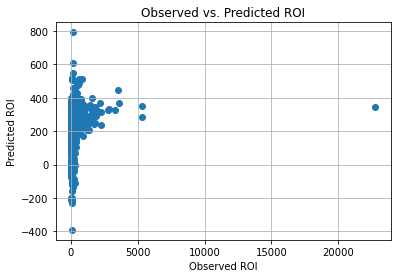

                                 OLS Regression Results                                
Dep. Variable:     percentage_ROI_gross_budget   R-squared:                       0.020
Model:                                     OLS   Adj. R-squared:                  0.018
Method:                          Least Squares   F-statistic:                     8.800
Date:                         Thu, 26 Oct 2023   Prob (F-statistic):           8.90e-06
Time:                                 18:35:17   Log-Likelihood:                -10336.
No. Observations:                         1290   AIC:                         2.068e+04
Df Residuals:                             1286   BIC:                         2.070e+04
Df Model:                                    3                                         
Covariance Type:                     nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [10]:
# Add constant intercept to variables
X = sm.add_constant(master_final_df[['budget', 'average_rating', 'number_vote']])

# Dependent variable
y = master_final_df['percentage_ROI_gross_budget']

# Apply fit test to model
model = sm.OLS(y, X).fit()

# Predicted values from model
predicted_values = model.predict(X)

# Create a scatter plot of observed vs. predicted ROI values
plt.scatter(y, predicted_values)
plt.xlabel('Observed ROI')
plt.ylabel('Predicted ROI')
plt.title('Observed vs. Predicted ROI')
plt.grid(True)
plt.show()


# Regression summary
print(model.summary())


### Interpretation

The low R-squared value suggests that this model may not be a good fit for explaining ROI. Additional factors or variables may be needed to improve its performance.

However, the results indicate that 'budget' and 'number_vote' are statistically significant predictors of ROI because they have very low p-values, while 'average_rating' may not be relevant in explaining variations in ROI.

## Linear Regression Model: budget & gross (revenue)

### Independent Variable

**Null Hypothesis:** The variable has no effect on revenue, and the coefficient is equal to zero.

**Alternative Hypothesis:** The variable has an effect on revenue, and the coefficient is not equal to zero.


### Dependent Variable

**Null Hypothesis:** The intercept represents a baseline revenue when the independent variable is zero.

**Alternative Hypothesis:** The intercept does not represent a meaningful baseline revenue when the independent variable is zero.

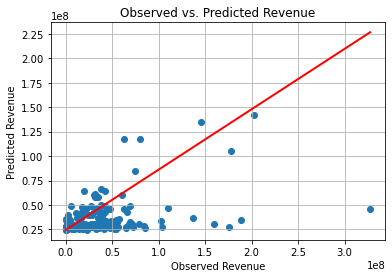

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.174
Method:                 Least Squares   F-statistic:                     32.29
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           6.83e-08
Time:                        18:55:41   Log-Likelihood:                -2843.0
No. Observations:                 150   AIC:                             5690.
Df Residuals:                     148   BIC:                             5696.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.456e+07   4.07e+06      6.039      0.0

In [16]:
# Add constant intercept to variables
X = sm.add_constant(horror_movies[['budget']])

# Dependent variable
y = horror_movies['gross']

# Apply fit test to model
model = sm.OLS(y, X).fit()

# Predicted values from model
predicted_values = model.predict(X)

# Create a scatter plot of observed vs. predicted ROI values
plt.scatter(y, predicted_values)
plt.xlabel('Observed Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Observed vs. Predicted Revenue')
plt.grid(True)

# Calculate the minimum and maximum 'gross' values
min_gross = min(y)
max_gross = max(y)

# Create x values for the trendline (from min to max 'gross')
x_trendline = np.linspace(min_gross, max_gross, 100)

# Calculate corresponding predicted values for the trendline
y_trendline = model.predict(sm.add_constant(x_trendline))

# Add a regression line
plt.plot(x_trendline, y_trendline, color='red', linewidth=2, label='Trendline')


plt.show()


# Regression summary
print(model.summary())


### Interpretation

The low R-squared value suggests that budget explains only a small portion (17.9%) of the variance in revenue for horror movies.

However, the results indicate that horror movie budgets are a statistically significant predictor of horror movie revenue because of its low p-value for the F-statistic and coefficient. 

Therefore, although budget is statistically significant in this model, there are other variables that can influence horror movie revenue.

## Multiple Linear Regression Model: budget, genres, primary_name

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create separate LabelEncoder instances for 'Genre' and 'Director'
label_encoder_genres = LabelEncoder()
label_encoder_primary_name = LabelEncoder()

# Apply label encoding to 'Genre' column
master_final_df['genres_encoded'] = label_encoder_genres.fit_transform(master_final_df['genres'])

# Apply label encoding to 'Director' column
master_final_df['primary_name_encoded'] = label_encoder_primary_name.fit_transform(master_final_df['primary_name'])

# Resulting DataFrame with label encoding for both columns
master_final_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1290 entries, 0 to 1289
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   movie_name                   1290 non-null   object 
 1   genres                       1290 non-null   object 
 2   percentage_ROI_gross_budget  1290 non-null   float64
 3   gross                        1290 non-null   float64
 4   budget                       1290 non-null   float64
 5   opening_weekend_boxoffice    1290 non-null   float64
 6   average_rating               1290 non-null   float64
 7   number_vote                  1290 non-null   float64
 8   primary_name                 1290 non-null   object 
 9   primary_profession           1290 non-null   object 
 10  release_date                 1290 non-null   object 
 11  release_year                 1290 non-null   int64  
 12  runtime_minutes              1290 non-null   float64
 13  distributor       

Mean Squared Error: 4065359596403251.50
R-squared: 0.42


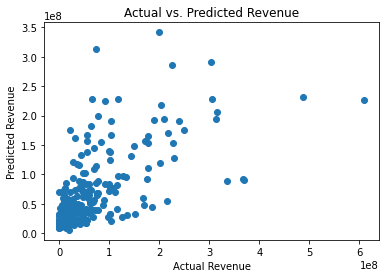

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and preprocess the dataset (replace 'df' with your dataset)
# Ensure that 'budget' and 'revenue' are numerical columns.
# Encode categorical variables like genres and directors.

# Split the data into training and testing sets
x = master_final_df[['budget', 'genres_encoded', 'primary_name_encoded']]  # Features
y = master_final_df['gross']  # Target variable
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mae = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mae:.2f}")
print(f"R-squared: {r_squared:.2f}")

# Visualize predictions vs. actual values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs. Predicted Revenue")
plt.show()